<a href="https://colab.research.google.com/github/thaiassiaht/Capacita-Brasil-C-jovem---Ci-ncia-de-Dados/blob/main/modulo-intermediario/Oficina_5_Implementando_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

        area_lote  ano_construcao  area_primeiro_andar  area_segundo_andar  \
count  1000.00000     1000.000000          1000.000000         1000.000000   
mean   5594.25600     1985.008000          2721.917000         1537.455000   
std    2533.55383       21.024318          1255.564277          892.987289   
min    1004.00000     1950.000000           506.000000            2.000000   
25%    3467.50000     1967.000000          1635.500000          699.000000   
50%    5750.00000     1984.000000          2703.500000         1581.000000   
75%    7806.75000     2003.000000          3813.500000         2347.500000   
max    9996.00000     2022.000000          4999.000000         2998.000000   

         banheiros  quartos_acima_solo  total_quartos    preco_venda  
count  1000.000000         1000.000000    1000.000000    1000.000000  
mean      2.547000            3.063000       3.957000  126785.570765  
std       1.114914            1.383092       2.024166   58619.810449  
min       1.0

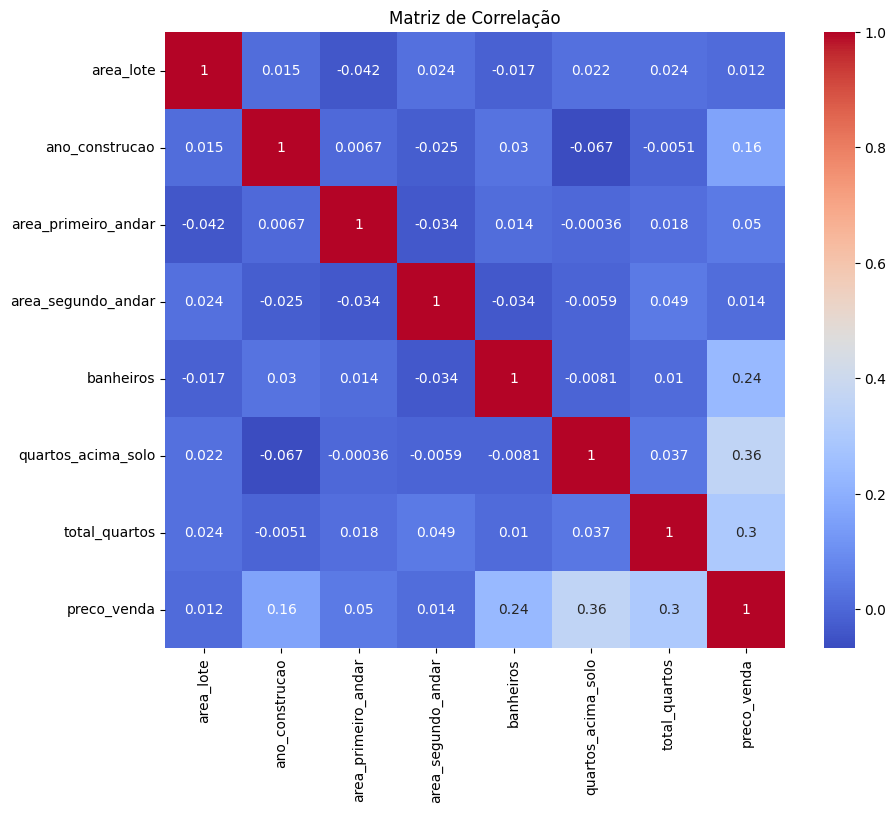

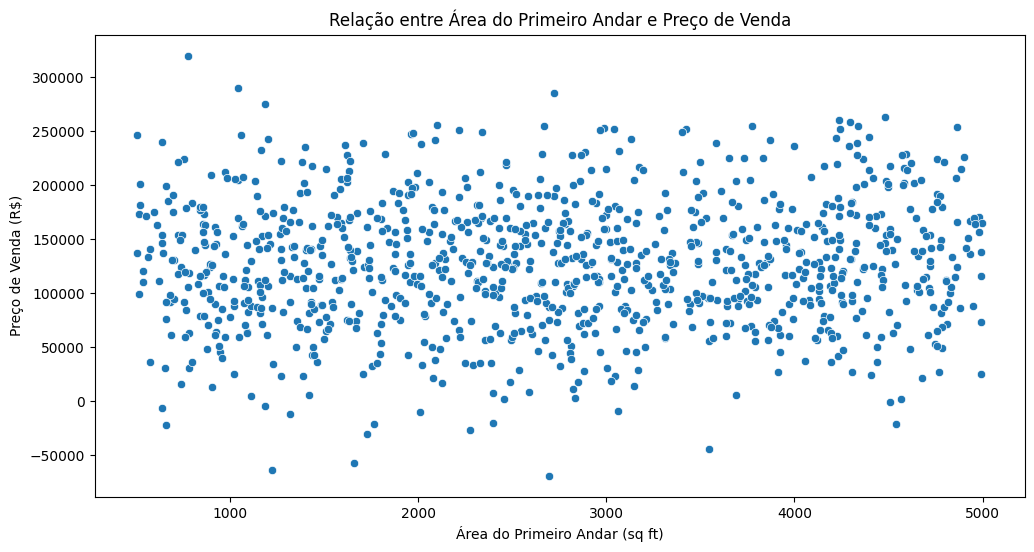



Tamanho do conjunto de treino: (800, 7)
Tamanho do conjunto de teste: (200, 7)



Coeficientes do modelo:
area_lote: 0.07
ano_construcao: 460.63
area_primeiro_andar: 1.32
area_segundo_andar: 0.67
banheiros: 12904.79
quartos_acima_solo: 15492.09
total_quartos: 7600.98



Intercept: -902441.66



Métricas de Avaliação:
MSE: 2333390660.73
RMSE: 48305.18
R²: 0.34


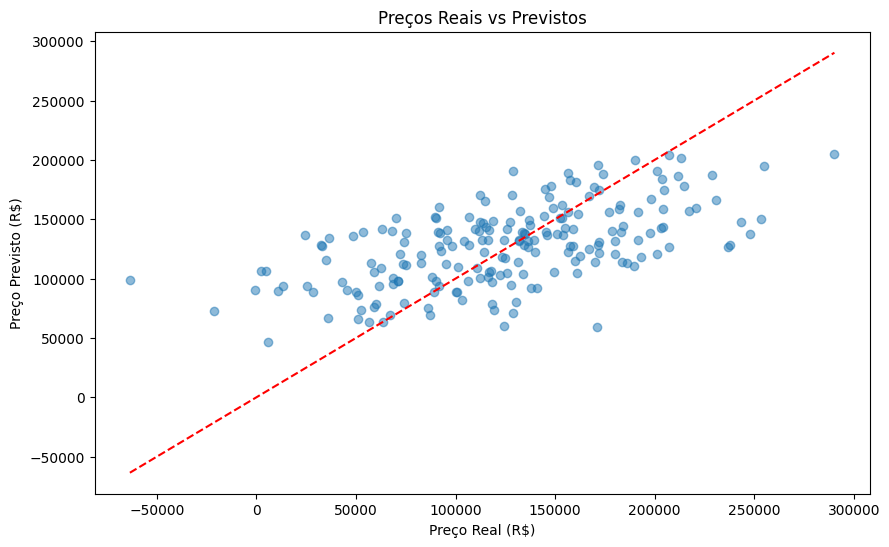

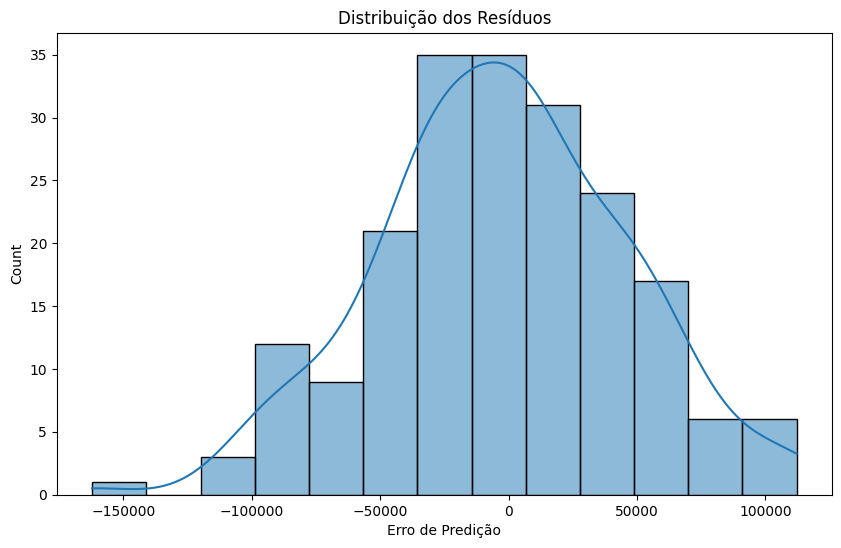

In [ ]:
np.random.seed(42)
n_samples = 1000
data = {
    'area_lote': np.random.randint(1000, 10000, size=n_samples),
    'ano_construcao': np.random.randint(1950, 2023, size=n_samples),
    'area_primeiro_andar': np.random.randint(500, 5000, size=n_samples),
    'area_segundo_andar': np.random.randint(0, 3000, size=n_samples),
    'banheiros': np.random.randint(1, 5, size=n_samples),
    'quartos_acima_solo': np.random.randint(1, 6, size=n_samples),
    'total_quartos': np.random.randint(1, 8, size=n_samples),
}

preco_base = (
    data['area_lote'] * 0.5 +
    data['area_primeiro_andar'] * 1.2 +
    data['area_segundo_andar'] * 0.8 +
    data['banheiros'] * 10000 +
    data['quartos_acima_solo'] * 15000 +
    data['total_quartos'] * 8000 +
    (data['ano_construcao'] - 1950) * 500
)

data['preco_venda'] = preco_base + np.random.normal(0, 50000, size=n_samples)
df = pd.DataFrame(data)
df.head()
np.random.seed(42)

n_samples = 1000
data = {
    'area_lote': np.random.randint(1000, 10000, size=n_samples),
    'ano_construcao': np.random.randint(1950, 2023, size=n_samples),
    'area_primeiro_andar': np.random.randint(500, 5000, size=n_samples),
    'area_segundo_andar': np.random.randint(0, 3000, size=n_samples),
    'banheiros': np.random.randint(1, 5, size=n_samples),
    'quartos_acima_solo': np.random.randint(1, 6, size=n_samples),
    'total_quartos': np.random.randint(1, 8, size=n_samples),
}

preco_base = (
    data['area_lote'] * 0.5 +
    data['area_primeiro_andar'] * 1.2 +
    data['area_segundo_andar'] * 0.8 +
    data['banheiros'] * 10000 +
    data['quartos_acima_solo'] * 15000 +
    data['total_quartos'] * 8000 +
    (data['ano_construcao'] - 1950) * 500
)

data['preco_venda'] = preco_base + np.random.normal(0, 50000, size=n_samples)

df = pd.DataFrame(data)
df.head()

# Estatísticas descritivas
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())
print("\n")
# Correlação entre variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()
print("\n")

# Visualizar relação entre área e preço
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area_primeiro_andar', y='preco_venda', data=df)
plt.title('Relação entre Área do Primeiro Andar e Preço de Venda')
plt.xlabel('Área do Primeiro Andar (sq ft)')
plt.ylabel('Preço de Venda (R$)')
plt.show()
print("\n")

# Definir variáveis independentes (X) e dependente (y)
X = df.drop('preco_venda', axis=1)
y = df['preco_venda']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print("\n")

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)


print("\nCoeficientes do modelo:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

print("\n")

print(f"\nIntercept: {model.intercept_:.2f}")
print("\n")

y_pred = model.predict(X_test)

# Calcular métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMétricas de Avaliação:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Visualizar previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Preço Real (R$)')
plt.ylabel('Preço Previsto (R$)')
plt.title('Preços Reais vs Previstos')
plt.show()

# Resíduos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Erro de Predição')
plt.show()

O modelo de regressão linear desenvolvido permite entender como cada característica da casa influencia seu preço de venda. Quando o coeficiente de uma variável é positivo, significa que o aumento dessa característica eleva o valor do imóvel. Por exemplo, se a área do lote tem um coeficiente positivo, casas com lotes maiores tendem a ser mais valiosas. Por outro lado, coeficientes negativos indicam uma relação inversa, quanto maior o valor daquela característica, menor tende a ser o preço da casa.

Embora o modelo linear simples ofereça bons insights iniciais, existem várias estratégias para melhorar sua precisão. Primeiramente, a engenharia de características pode ser aplicada para criar novas variáveis a partir das existentes, como calcular a área total construída somando primeiro e segundo andares. A normalização ou padronização dos dados também pode ajudar, especialmente quando as variáveis têm escalas muito diferentes.

Para alcançar resultados ainda melhores, vale a pena experimentar modelos mais complexos, como regressão polinomial (que captura relações não-lineares), Random Forest ou até mesmo redes neurais, dependendo da complexidade dos dados. Além disso, a coleta de dados adicionais - tanto mais exemplos de casas quanto novas características relevantes (como localização, proximidade de pontos de interesse ou qualidade dos materiais de construção) - pode enriquecer o modelo.

Por fim, é crucial analisar e tratar possíveis outliers, que são valores extremos que podem distorcer os resultados do modelo. Essas melhorias, combinadas com uma análise mais aprofundada dos dados reais, podem levar a previsões de preços mais precisas e confiáveis.

In [ ]:
nova_casa = pd.DataFrame({
    'area_lote': [5000],
    'ano_construcao': [2010],
    'area_primeiro_andar': [2000],
    'area_segundo_andar': [1500],
    'banheiros': [2],
    'quartos_acima_solo': [3],
    'total_quartos': [4]
})

preco_previsto = model.predict(nova_casa)

print(f"\nPreço previsto para a nova casa: R${preco_previsto[0]:.2f}")


Preço previsto para a nova casa: R$130119.35
